## **Import Needed libraries**

In [13]:
# !pip install spacy

# !python -m spacy download en_core_web_sm

In [14]:
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## **Data Representation**

In [15]:
df = pd.read_csv("Emotion_classify_Data.csv")

In [16]:
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


### Check Class Balance

In [18]:
df['Emotion'].value_counts()

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64

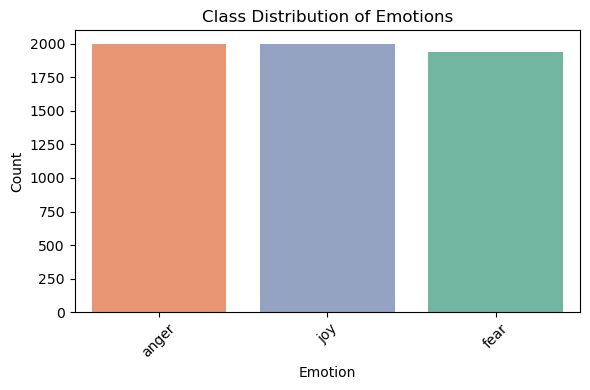

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(
    data=df,
    x='Emotion',
    hue='Emotion',
    order=df['Emotion'].value_counts().index,
    palette="Set2"
)
plt.title("Class Distribution of Emotions")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Preprocessing**

In [20]:
# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 
# type(nlp)

In [21]:
# use this utility function to get the preprocessed text data
def preprocess(text):

    text = text.lower() # Not needed here because the dataset is already in lowercase.
    custom_stopwords = nlp.Defaults.stop_words - {"no", "not", "never"}

    # remove stop words and lemmatize the text
    doc = nlp(text)
    # filtered_tokens = []
    # for token in doc:
    #     if token.text in custom_stopwords or token.is_punct:
    #         continue
    #     filtered_tokens.append(token.lemma_)

    filtered_tokens = [token.lemma_ for token in doc if token.text not in custom_stopwords and not token.is_stop and not token.is_punct and token.is_alpha]
    return " ".join(filtered_tokens) 

In [22]:
text = "Hello this is. a new year we are moving. to univeristeyt"

doc = nlp(text)
doc
for word in doc:
    print(word.text)
    # print(type(word.text))

# word[word for word in doc]

preprocess(text)

Hello
this
is
.
a
new
year
we
are
moving
.
to
univeristeyt


'hello new year move univeristeyt'

In [ ]:
df['preprocessed_comment'] = df['Comment'].apply(preprocess)

In [ ]:
df.head()

,Comment,Emotion,preprocessed_comment
0,i seriously hate one subject to death but now ...,fear,seriously hate subject death feel reluctant drop
1,im so full of life i feel appalled,anger,m life feel appalled
2,i sit here to write i start to dig out my feel...,fear,sit write start dig feeling think afraid accep...
3,ive been really angry with r and i feel like a...,joy,ve angry r feel like idiot trust place
4,i feel suspicious if there is no one outside l...,fear,feel suspicious no outside like rapture happen


In [ ]:
encoder = LabelEncoder()

df['emotion_num'] = encoder.fit_transform(df['Emotion'])

In [ ]:
df.head()

,Comment,Emotion,preprocessed_comment,emotion_num
0,i seriously hate one subject to death but now ...,fear,seriously hate subject death feel reluctant drop,1
1,im so full of life i feel appalled,anger,m life feel appalled,0
2,i sit here to write i start to dig out my feel...,fear,sit write start dig feeling think afraid accep...,1
3,ive been really angry with r and i feel like a...,joy,ve angry r feel like idiot trust place,2
4,i feel suspicious if there is no one outside l...,fear,feel suspicious no outside like rapture happen,1


In [ ]:
X = df['preprocessed_comment']
y = df['emotion_num']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['emotion_num'])

## **Text Representation**

In [ ]:
v = TfidfVectorizer()

X_train_cv = v.fit_transform(X_train)
X_test_cv = v.transform(X_test)

## **Data Modeling and Evaluation**

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB()
}


=== Logistic Regression ===
Accuracy: 91.92 %
Classification Report:
               precision    recall  f1-score   support

       anger       0.92      0.90      0.91       400
        fear       0.95      0.90      0.92       388
         joy       0.89      0.95      0.92       400

    accuracy                           0.92      1188
   macro avg       0.92      0.92      0.92      1188
weighted avg       0.92      0.92      0.92      1188



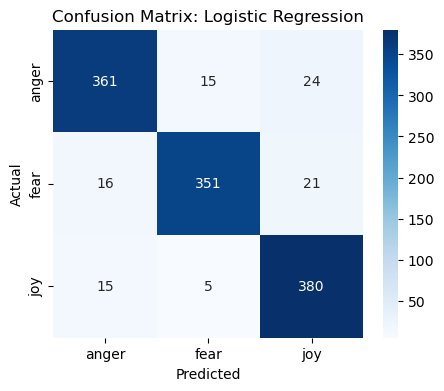


=== Random Forest ===
Accuracy: 93.18 %
Classification Report:
               precision    recall  f1-score   support

       anger       0.93      0.93      0.93       400
        fear       0.94      0.92      0.93       388
         joy       0.92      0.95      0.94       400

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188



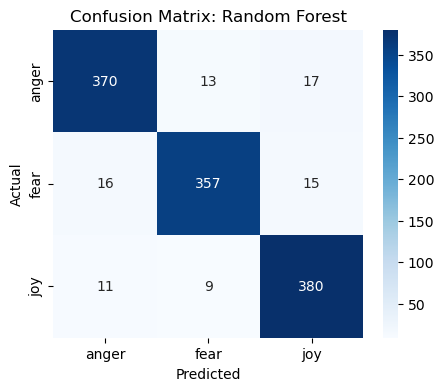


=== SVM ===
Accuracy: 92.00 %
Classification Report:
               precision    recall  f1-score   support

       anger       0.93      0.91      0.92       400
        fear       0.95      0.90      0.92       388
         joy       0.89      0.95      0.92       400

    accuracy                           0.92      1188
   macro avg       0.92      0.92      0.92      1188
weighted avg       0.92      0.92      0.92      1188



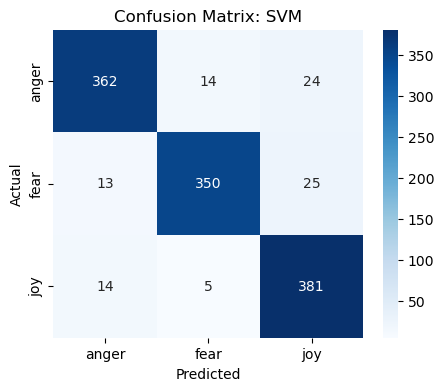


=== Naive Bayes ===
Accuracy: 89.73 %
Classification Report:
               precision    recall  f1-score   support

       anger       0.90      0.90      0.90       400
        fear       0.88      0.90      0.89       388
         joy       0.92      0.89      0.90       400

    accuracy                           0.90      1188
   macro avg       0.90      0.90      0.90      1188
weighted avg       0.90      0.90      0.90      1188



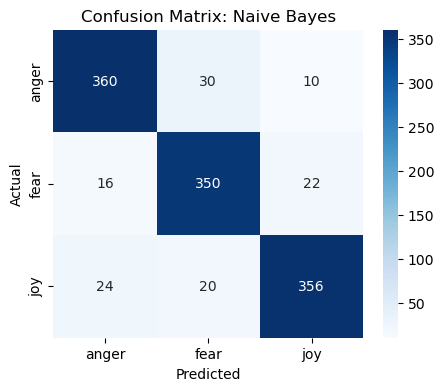

In [ ]:
results = {}

for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train_cv, y_train)
    y_pred = model.predict(X_test_cv)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc * 100:.2f} %")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_, cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))
    
    results[name] = float(f"{acc * 100:.2f}")

In [ ]:
print("\n---- Model Comparison ----")
for model_name, acc in results.items():
    print(f"{model_name}: {acc} %")

best_model = max(results, key=results.get)
print(f"\nBest Performing Model: {best_model}")


---- Model Comparison ----
Logistic Regression: 91.92 %
Random Forest: 93.18 %
SVM: 92.0 %
Naive Bayes: 89.73 %

Best Performing Model: Random Forest
